# Course 2: Applied Linear Algebra for Machine Learning

Matrices can be seen as linear transformation in a vector

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from utils.graphic_vectors import graph_vecs

In [2]:
A = np.array([[-1,3], [2,-2]])
print(A)

[[-1  3]
 [ 2 -2]]


In [4]:
vector = np.array([[2], [1]])
print(vector)
print(vector.flatten())

[[2]
 [1]]
[2 1]


In [5]:
#Since images are stored as matrices, it is good to know the usage of flatten
print(A)
print(A.flatten())

[[-1  3]
 [ 2 -2]]
[-1  3  2 -2]


(-0.5, 2.0)

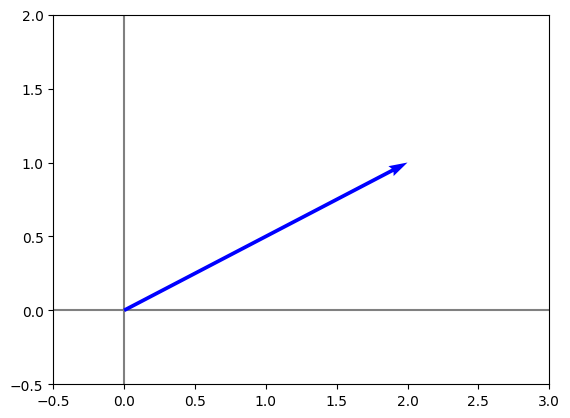

In [6]:
graph_vecs([vector.flatten()], cols = 'blue')

plt.xlim(-0.5, 3)
plt.ylim(-0.5, 2)

In [8]:
vector_transformed = A.dot(vector) #Apply matrix on vector

print(vector)
print(vector_transformed)

[[2]
 [1]]
[[1]
 [2]]


(-0.5, 3.0)

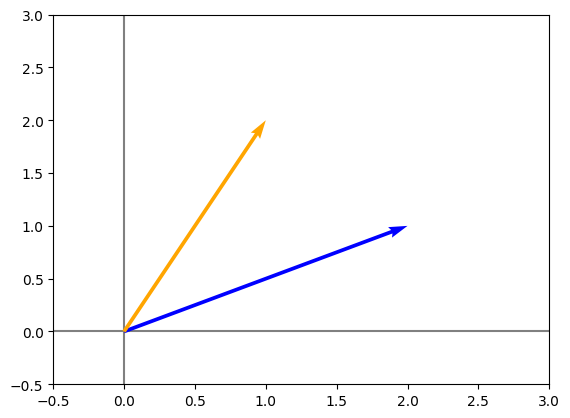

In [10]:
graph_vecs([vector.flatten(), vector_transformed.flatten()], 
           cols= ['blue', 'orange'])
plt.xlim(-0.5, 3)
plt.ylim(-0.5, 3)

In [12]:
print(np.linalg.det(A))

-4.0


In [13]:
print(np.linalg.norm(vector))
print(np.linalg.norm(vector_transformed))

2.23606797749979
2.23606797749979


# EigenValues and EigenVectors
Eigenvector ->  a vector that doesn't change when a transformation is applied on it

In [20]:
orange_light = '#FF9A13'
blue_light = '#1190FF'

In [15]:
X = np.array([[3,2], [4,1]])
print(X)

[[3 2]
 [4 1]]


In [16]:
v = np.array([[1], [1]])
print(v)

[[1]
 [1]]


In [17]:
u = X.dot(v)
print(u)

[[5]
 [5]]


(-1.0, 6.0)

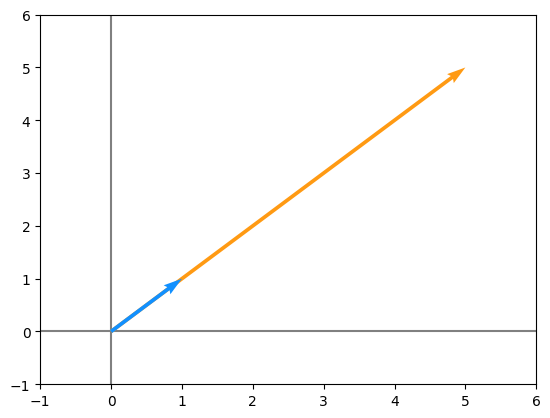

In [21]:
graph_vecs([u.flatten(), v.flatten()], cols=[orange_light, blue_light])

plt.xlim(-1, 6)
plt.ylim(-1, 6)

Eigenvector could be pointing at the same direction but it could have a different amplitude due to the eigenvalue

In [22]:
lambda_1 = 5

lambda_1 * v

array([[5],
       [5]])

In [23]:
s = np.array([[-1], [2]])
print(s)

[[-1]
 [ 2]]


In [24]:
t = X.dot(s)
print(t)

[[ 1]
 [-2]]


Here, we can see that the eigenvector is still in the same path or direction (it keeps its angle), but its maginute and orientation could change.

(-3.0, 3.0)

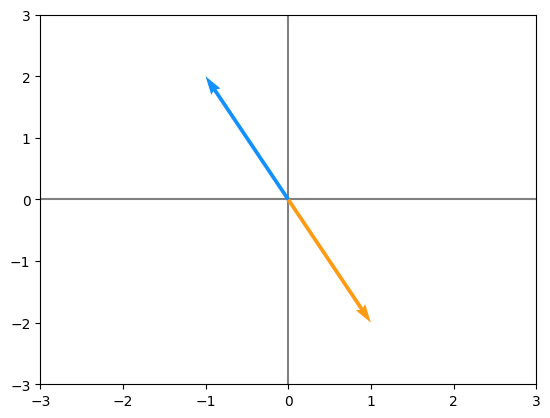

In [27]:
graph_vecs([t.flatten(), s.flatten()], cols=[orange_light, blue_light])

plt.xlim(-3, 3)
plt.ylim(-3, 3)

# how to calculate eigenvalues and eigenvectors

In [28]:
X = np.array([[3,2], [4,1]])

print(X)

[[3 2]
 [4 1]]


In [29]:
print(np.linalg.eig(X))

EigResult(eigenvalues=array([ 5., -1.]), eigenvectors=array([[ 0.70710678, -0.4472136 ],
       [ 0.70710678,  0.89442719]]))


In [30]:
eigenvalues, eigenvectors = np.linalg.eig(X)
print(eigenvalues)

[ 5. -1.]


In [ ]:
######################## EXAM ###########################
mexam = np.array([[3, 4], [3,2]])
eigenvalues_exam, eigenvectors_exam = np.linalg.eig(mexam)

print(f"eigenvalues: {eigenvalues_exam}")
print(f"eigenvectors: {eigenvectors_exam}")

eigenvalues: [ 6. -1.]
eigenvectors: [[ 0.8        -0.70710678]
 [ 0.6         0.70710678]]


In [31]:
print(eigenvectors[:, 0])

[0.70710678 0.70710678]


In [32]:
print(eigenvectors[:, 1])

[-0.4472136   0.89442719]


In [33]:
v = np.array([[-1], [2]])
Xv = X.dot(v)
v_np = eigenvectors[:, 1]

They are the same vector in a way. They keep the angle. What changes is the eigenvalue associated to it (magnitude and dir)


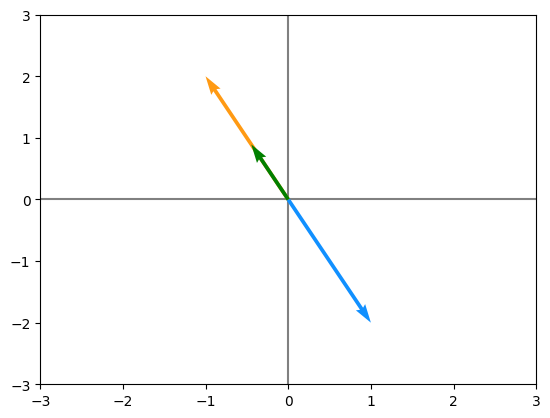

In [36]:
graph_vecs([Xv.flatten(), v.flatten(), v_np], cols=[blue_light, orange_light, 'green'])
plt.xlim(-3, 3)
plt.ylim(-3, 3)

print("They are the same vector in a way. They keep the angle. What changes is the eigenvalue associated to it (magnitude and dir)")


## Matrix decomposition

Find two or more matrices that can help me to write the original matrix

* V = [Eigenvectors]
* lambda =  [Inverse of eigenvectors]

A = [Eigenvectors] [eigenvalues in a diagonal] [Inverse of eigenvectors]

In [38]:
A = np.array([[3, 2], [4, 1]])
print(A)

[[3 2]
 [4 1]]


In [39]:
eigenvalues, eigenvectors = np.linalg.eig(A)
print(eigenvalues)
print(eigenvectors)

[ 5. -1.]
[[ 0.70710678 -0.4472136 ]
 [ 0.70710678  0.89442719]]


In [40]:
A_calc = eigenvectors.dot(np.diag(eigenvalues)).dot(np.linalg.inv(eigenvectors))
print(A_calc)

[[3. 2.]
 [4. 1.]]


In [41]:
#Symmetric and real
A = np.array([[3, 2], [2, 3]])
print(A)

[[3 2]
 [2 3]]


In [43]:
print("Symmetric matrix:\n", A == A.T)

Symmetric matrix:
 [[ True  True]
 [ True  True]]


In [44]:
eigenvalues, eigenvectors = np.linalg.eig(A)
print(eigenvalues)
print(eigenvectors)

[5. 1.]
[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]


If matrix is symmetric, then:

* A = A.T

* A = V.diag(lambda).V.T

Computing a transpose is easier than computing an inverse

In [46]:
A_calc = eigenvectors.dot(np.diag(eigenvalues)).dot(eigenvectors.T)
print(A_calc)

[[3. 2.]
 [2. 3.]]


# Singular Value Decomposition

Eigenvalues and eigenvectors decomposition of a matrix can only be applied when matrix is squared. 

In order to decompose a non-square matrix, we would need to use singular value decomposition (SVD).

U = orthogonal matrix -> Singular vectors (left)

V = orthogonal matrix -> singular vectors (right)

D = diagonal matrix -> All singular values in diagonal and zeros outside.

In [47]:
A = np.array([[1,2,3], [3,4,5]])

print(A)

[[1 2 3]
 [3 4 5]]


In [49]:
U, D, V = np.linalg.svd(A)
print(U)
print(np.diag(D))
print(V)

[[-0.46410668 -0.88577931]
 [-0.88577931  0.46410668]]
[[7.97638869 0.        ]
 [0.         0.61418515]]
[[-0.39133557 -0.5605708  -0.72980603]
 [ 0.8247362   0.13817999 -0.54837623]
 [ 0.40824829 -0.81649658  0.40824829]]


We are compressing information from R to R**-1

A = U * D * V

# Three transformations

Since we have 3 matrices, each of them could be represented as a transformation as well

[[3 7]
 [5 2]]
Unit circle


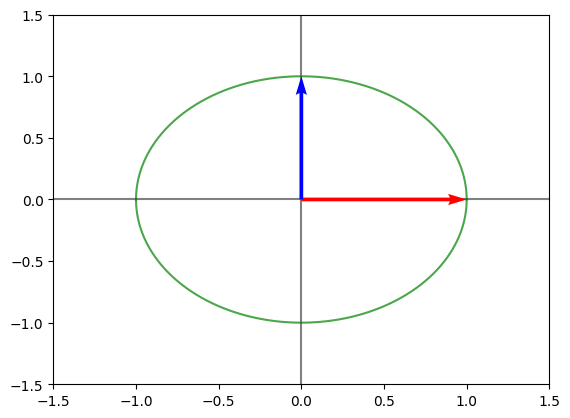

 Transformed unit circle


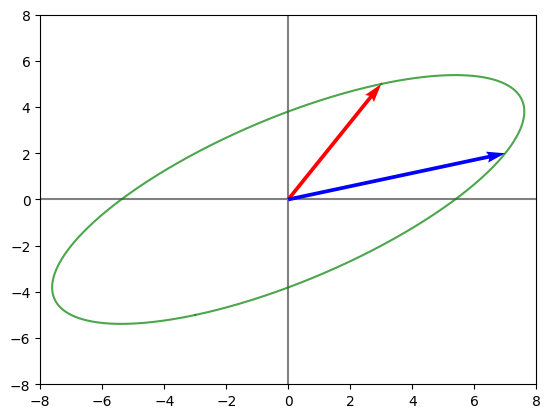

In [2]:
from utils.graph_matrix import graph_matrix


A = np.array([[3, 7], [5, 2]])
print(A)
print("Unit circle")
graph_matrix(np.array([[1,0], [0,1]]))
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)
plt.show()

print(" Transformed unit circle")
graph_matrix(A)
plt.xlim(-8, 8)
plt.ylim(-8, 8)
plt.show()

In [4]:
U, D, V = np.linalg.svd(A)
print(U)

[[-0.85065081 -0.52573111]
 [-0.52573111  0.85065081]]


Unit circle


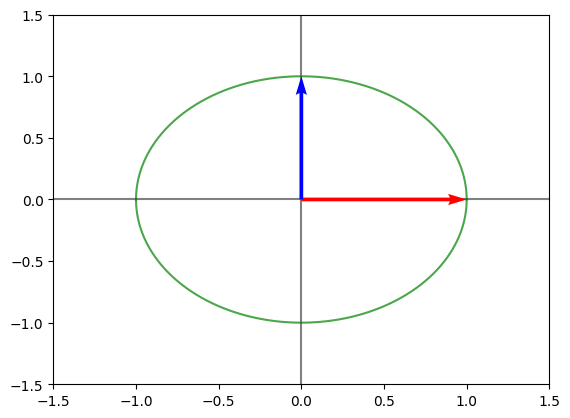

First transformation V: Rotation


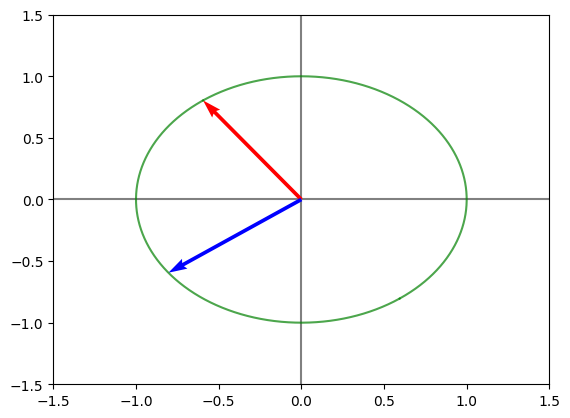

Second transformation D: Scale


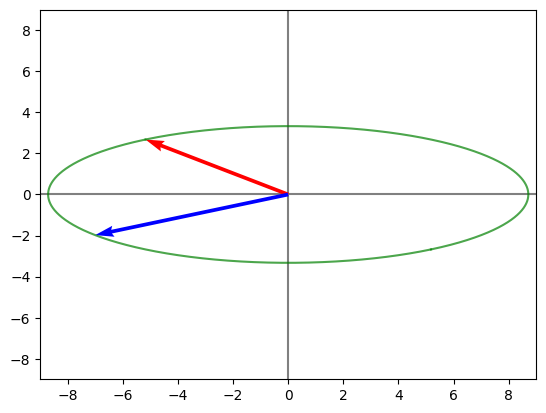

Third transformation D: Second Rotation


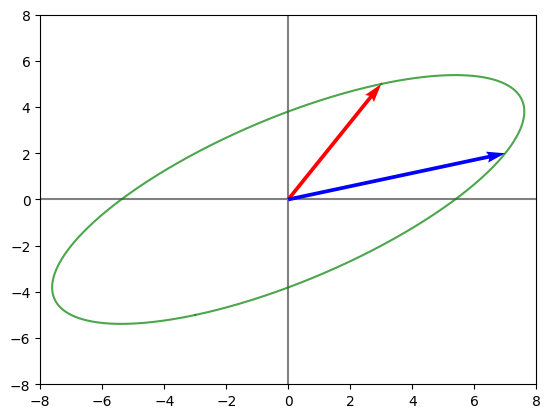

In [7]:
print("Unit circle")
graph_matrix(np.array([[1,0], [0,1]]))
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)
plt.show()

print("First transformation V: Rotation")
graph_matrix(V)
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)
plt.show()

print("Second transformation D: Scale")
graph_matrix(np.diag(D).dot(V))
plt.xlim(-9, 9)
plt.ylim(-9, 9)
plt.show()

print("Third transformation D: Second Rotation")
graph_matrix(U.dot(np.diag(D).dot(V)))
plt.xlim(-8, 8)
plt.ylim(-8, 8)
plt.show()

Check if the transformation is equal to A 


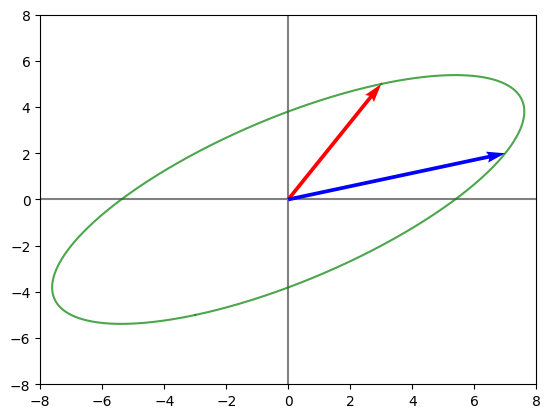

In [8]:
print("Check if the transformation is equal to A ")
graph_matrix(A)
plt.xlim(-8, 8)
plt.ylim(-8, 8)
plt.show()

# How to interpret singular values

In [4]:
A = np.array([[3, 7], [5, 2]])
print(A)

[[3 7]
 [5 2]]


In [5]:
U, D, V = np.linalg.svd(A)

print(D[0])
print(D[1])

8.7133796929634
3.3282148858288965


In [6]:
u1 = [D[0] * U[0,0], D[0] * U[0,1]]
v1 =[D[1] * U[1,0], D[1] * U[1,1]]

print([A[0,0], A[1,0]])
print(u1)
print()

print(A[0,1], A[1,1])
print(v1)

[np.int64(3), np.int64(5)]
[np.float64(-7.4120434792975685), np.float64(-4.580894796297923)]

7 2
[np.float64(-1.7497461132982814), np.float64(2.8311486829996433)]


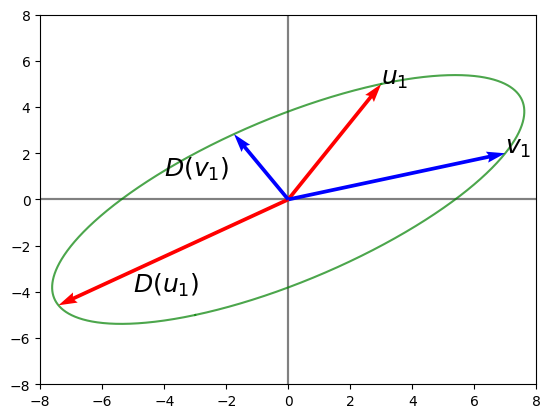

In [8]:
graph_matrix(A)
graph_vecs([u1, v1], cols = ['red', 'blue'])

plt.text(3, 5, r"$u_1$", size=18)
plt.text(7, 2, r"$v_1$", size=18)

plt.text(-5, -4, r"$D(u_1)$", size=18)
plt.text(-4, 1, r"$D(v_1)$", size=18)

plt.xlim(-8,8)
plt.ylim(-8,8)

plt.show()

# An image is a matrix

We can apply SVD to an image in order to reduce its memory size.

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
plt.style.use('classic')

Computer will see a matrix or several matrices according to the format of the image


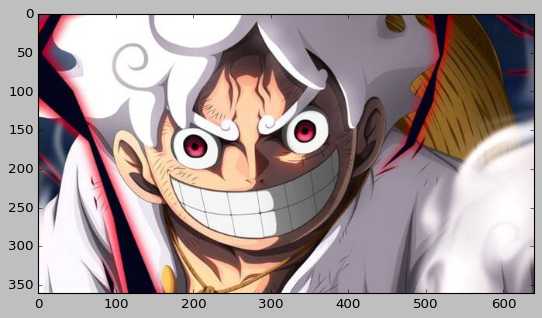

In [5]:
image = Image.open("./Images/gear_5.jpg")

print("Computer will see a matrix or several matrices according to the format of the image")
plt.imshow(image)

<PIL.Image.Image image mode=LA size=640x360 at 0x286758B4D50>


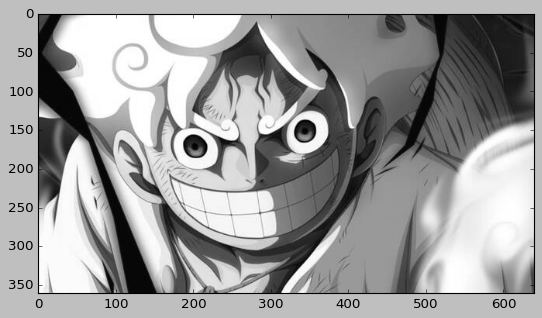

In [9]:
image = image.convert('LA')
print(image)
plt.imshow(image)

In [10]:
image_mat = np.array(list(image.getdata(band=0)),float)
print(image_mat)

[ 68.  69.  71. ... 102.  74.  65.]


In [ ]:
#Converting to a matrix
image_mat.shape = (image.size[1], image.size[0])
print(image_mat)

[[ 68.  69.  71. ...  29.  29.  29.]
 [ 68.  69.  71. ...  29.  29.  29.]
 [ 69.  70.  71. ...  29.  29.  29.]
 ...
 [251. 251. 251. ...  99.  72.  67.]
 [251. 251. 251. ... 101.  74.  66.]
 [251. 251. 251. ... 102.  74.  65.]]


In [12]:
print(image_mat.shape)

(360, 640)


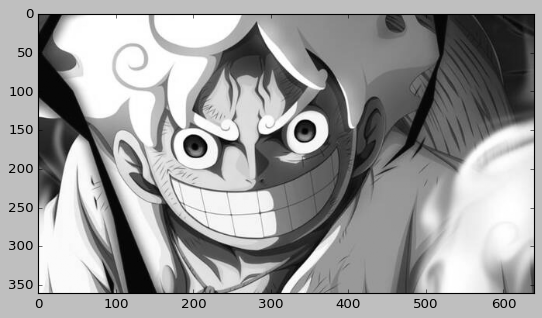

In [13]:
plt.imshow(image_mat, cmap='gray')
plt.show()

In [14]:
image_mat_2 = image_mat/10
print(image_mat_2)

[[ 6.8  6.9  7.1 ...  2.9  2.9  2.9]
 [ 6.8  6.9  7.1 ...  2.9  2.9  2.9]
 [ 6.9  7.   7.1 ...  2.9  2.9  2.9]
 ...
 [25.1 25.1 25.1 ...  9.9  7.2  6.7]
 [25.1 25.1 25.1 ... 10.1  7.4  6.6]
 [25.1 25.1 25.1 ... 10.2  7.4  6.5]]


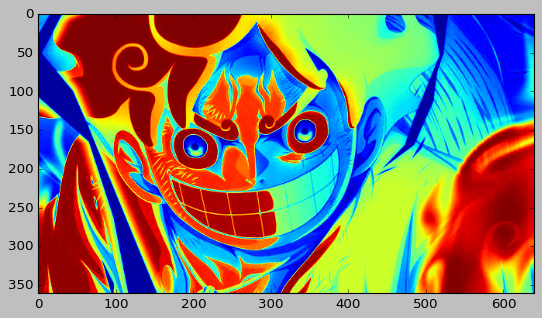

In [15]:
plt.imshow(image_mat_2)
plt.show()

The values that we have are not that important, but the relationship that exists between them


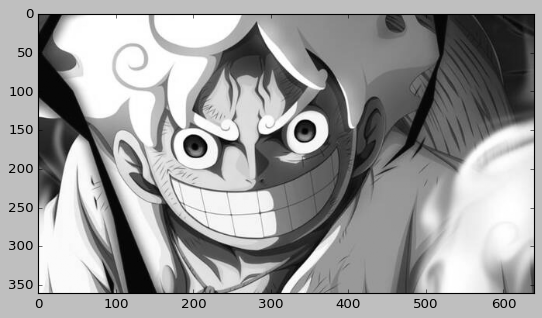

In [17]:
print("The values that we have are not that important, but the relationship that exists between them")
plt.imshow(image_mat_2, cmap = 'gray')
plt.show()

In [18]:
print(np.max(image_mat_2))
print(np.max(image_mat))

25.5
255.0


In [19]:
print(np.min(image_mat_2))
print(np.min(image_mat))

0.0
0.0


# SVD to an Image

To reduce the size of file, we need to define when is the image still being recognizable

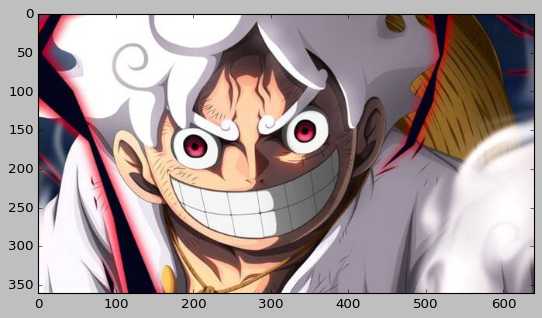

In [37]:
image_original = Image.open("./Images/gear_5.jpg")
plt.imshow(image_original)
plt.show()

In [38]:
image_gr = image_original.convert('LA')

image_mat = np.array(list(image_gr.getdata(band=0)), float)
print(image_mat.shape)
image_mat.shape = (image_gr.size[1], image_gr.size[0])

(230400,)


In [23]:
U, D, V = np.linalg.svd(image_mat)

In [ ]:
print(image_mat.shape)
print(U.shape)
print(D.shape) #360 SINGULAR VALUES (First value has the most important info, more variance from data)
print(V.shape) #FINAL ROTATION -> TO GIVE THE FINAL SHAPE OF THE IMAGE

(360, 640)
(360, 360)
(360,)
(640, 640)


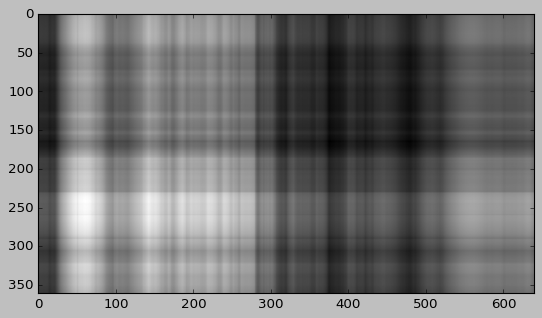

In [25]:
image_recons = np.matrix(U[:, :1]) * np.diag(D[:1]) * np.matrix(V[:1, :])
plt.imshow(image_recons, cmap = 'gray') #Gray so we don't see the color effects


# SVD

Based on the fact that the majority of singular values are not capturing relevant variance from the image

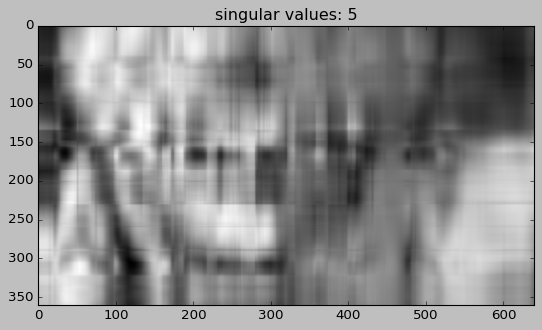

In [28]:
i = 5
image_recons = np.matrix(U[:, :i]) * np.diag(D[:i]) * np.matrix(V[:i, :])
plt.imshow(image_recons, cmap = 'gray') #Gray so we don't see the color effects

title = f'singular values: {i}'

plt.title(title)
plt.show()

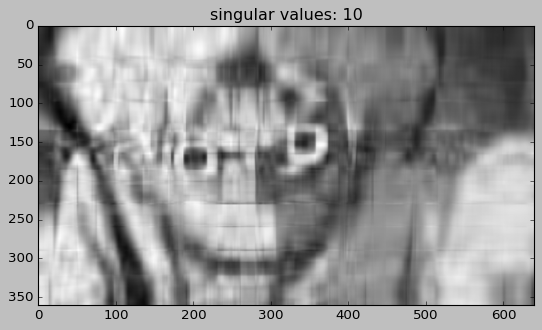

In [29]:
i = 10
image_recons = np.matrix(U[:, :i]) * np.diag(D[:i]) * np.matrix(V[:i, :])
plt.imshow(image_recons, cmap = 'gray') #Gray so we don't see the color effects

title = f'singular values: {i}'

plt.title(title)
plt.show()

## The right value depends on the use case.

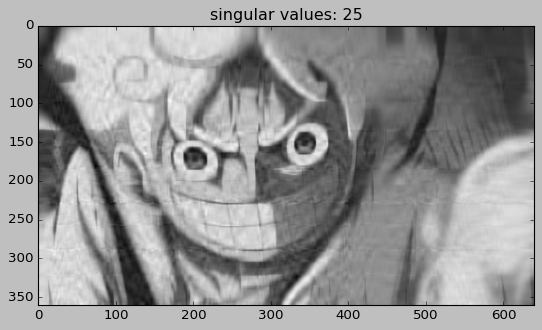

In [30]:
i = 25
image_recons = np.matrix(U[:, :i]) * np.diag(D[:i]) * np.matrix(V[:i, :])
plt.imshow(image_recons, cmap = 'gray') #Gray so we don't see the color effects

title = f'singular values: {i}'

plt.title(title)
plt.show()

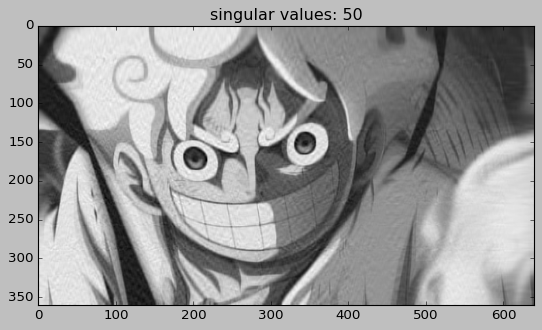

In [31]:
i = 50
image_recons = np.matrix(U[:, :i]) * np.diag(D[:i]) * np.matrix(V[:i, :])
plt.imshow(image_recons, cmap = 'gray') #Gray so we don't see the color effects

title = f'singular values: {i}'

plt.title(title)
plt.show()

# Moon Penrose pseudoinverse
To solve linear systems

A * x = b

If there is a solution, that is, A**-1

Then

X = (A**-1)*(b)

If A**-1 doesn't exist, then, we find A_pse

A*A_pse ~ Id

In [32]:
np.set_printoptions(suppress = True)

# Moore Penrose
D_pse = not exactly the D, it is a transformation from it
A_pse = V * D_pse * (U**T) -> This retrieves something close to the identity

In [33]:
A = np.array([[2, 3], [5, 7], [11, 13]])
print(A)

[[ 2  3]
 [ 5  7]
 [11 13]]


In [34]:
U, D, V = np.linalg.svd(A)

print("U \n", U)
print("D \n", D)
print("V \n", V)

U 
 [[-0.18499741 -0.47276624 -0.86154979]
 [-0.44249308 -0.74271297  0.50257071]
 [-0.87748267  0.4742041  -0.07179582]]
D 
 [19.40321383  0.71783924]
V 
 [[-0.63055377 -0.77614557]
 [ 0.77614557 -0.63055377]]


In [35]:
D_pse = np.zeros((A.shape[0], A.shape[1])).T
print(D_pse)

[[0. 0. 0.]
 [0. 0. 0.]]


### Calculatin D_pse
It is like finding 1/value for each element of D

In [36]:
print("Values to replace in D_pse")
print(D_pse[:D.shape[0], :D.shape[0]])

Values to replace in D_pse
[[0. 0.]
 [0. 0.]]


In [37]:
print("Values to inject in D_pse")
print(np.linalg.inv(np.diag(D)))

Values to inject in D_pse
[[0.05153785 0.        ]
 [0.         1.39306957]]


In [38]:
print("D_pse")
D_pse[:D.shape[0], :D.shape[0]] = np.linalg.inv(np.diag(D))
print(D_pse)

D_pse
[[0.05153785 0.         0.        ]
 [0.         1.39306957 0.        ]]


In [39]:
A_pse = V.T.dot(D_pse).dot(U.T)
print(A_pse)

[[-0.50515464 -0.78865979  0.54123711]
 [ 0.42268041  0.67010309 -0.3814433 ]]


In [40]:
#Using numpy instead
A_pse_calc = np.linalg.pinv(A)
print(A_pse_calc)

[[-0.50515464 -0.78865979  0.54123711]
 [ 0.42268041  0.67010309 -0.3814433 ]]


In [35]:
###################### EXAM ##########333
A_exam = np.array([[1, 2], [3, 4], [5, 6]])
A_pse_exam = np.linalg.pinv(A_exam)
print(A_pse_exam)

[[-1.33333333 -0.33333333  0.66666667]
 [ 1.08333333  0.33333333 -0.41666667]]


In [42]:
print("We get something really close to the identity matrix")
print(A_pse.dot(A))

We get something really close to the identity matrix
[[ 1. -0.]
 [ 0.  1.]]


In [ ]:
np.set_printoptions(suppress=False)
print("We get something really close to the identity matrix")
print(A_pse.dot(A))

We get something really close to the identity matrix
[[ 1.00000000e+00 -1.77635684e-15]
 [ 4.44089210e-16  1.00000000e+00]]


In [45]:
print("It has an order, it is not commutative")
print(A.dot(A_pse))

It has an order, it is not commutative
[[ 0.25773196  0.43298969 -0.06185567]
 [ 0.43298969  0.74742268  0.03608247]
 [-0.06185567  0.03608247  0.99484536]]


In [46]:
A_pse_2 = np.linalg.inv(A.T.dot(A)).dot(A.T)
print(A_pse_2)

[[-0.50515464 -0.78865979  0.54123711]
 [ 0.42268041  0.67010309 -0.3814433 ]]


In [47]:
print(A_pse)

[[-0.50515464 -0.78865979  0.54123711]
 [ 0.42268041  0.67010309 -0.3814433 ]]


# Overdetermined system

2 variables and 3 equations

1 solution (x) -> we have the inverse (square matrix and all vector linearly ind)

Ax = b

A_pse = x so ||Ax-b||2 min

In [39]:
################ EXAM ################
x = np.linspace(-5, 5, 1000)
y_1 = 1*x + 4
y_2 = 2*x + 5
y_3 = -3*x + 6

matriz = np.array([[-1, 1], [-2, 1], [3, 1]]) #
print(matriz)

matriz_pse = np.linalg.pinv(matriz)
print(matriz_pse)

b = np.array([[4], [5], [6]])
print(b)

resultado = matriz_pse.dot(b)
print(resultado)

[[-1  1]
 [-2  1]
 [ 3  1]]
[[-0.07142857 -0.14285714  0.21428571]
 [ 0.33333333  0.33333333  0.33333333]]
[[4]
 [5]
 [6]]
[[0.28571429]
 [5.        ]]


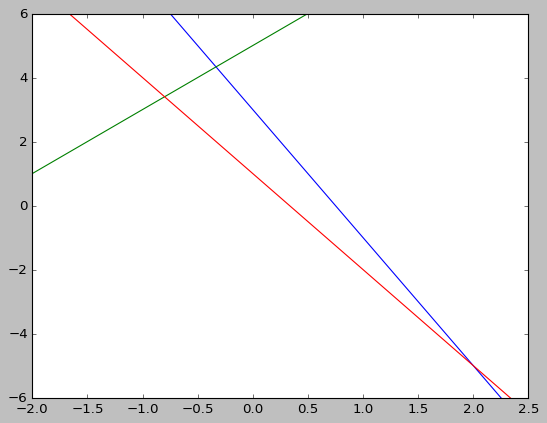

In [ ]:
x = np.linspace(-5, 5, 1000)
y_1 = -4*x + 3
y_2 = 2*x + 5
y_3 = -3*x + 1

plt.plot(x, y_1)
plt.plot(x, y_2)
plt.plot(x, y_3)

plt.xlim(-2, 2.5)
plt.ylim(-6, 6)

plt.show()

In [51]:
matriz = np.array([[4, 1], [-2, 1], [3, 1]]) #
print(matriz)

[[ 4  1]
 [-2  1]
 [ 3  1]]


In [52]:
matriz_pse = np.linalg.pinv(matriz)
print(matriz_pse)

[[ 0.11290323 -0.17741935  0.06451613]
 [ 0.14516129  0.62903226  0.22580645]]


In [53]:
b = np.array([[3], [5], [1]])
print(b)

[[3]
 [5]
 [1]]


In [54]:
resultado = matriz_pse.dot(b)
print(resultado)

[[-0.48387097]
 [ 3.80645161]]


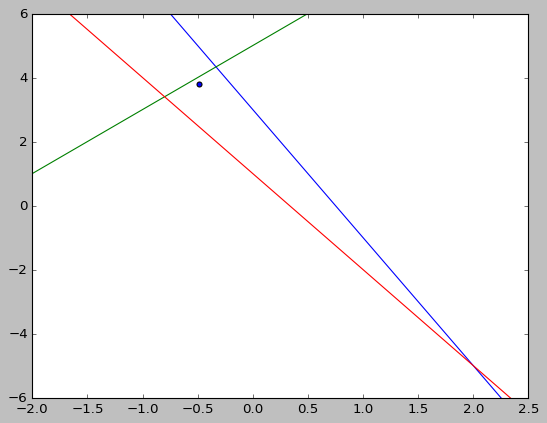

In [55]:
plt.plot(x, y_1)
plt.plot(x, y_2)
plt.plot(x, y_3)

plt.xlim(-2, 2.5)
plt.ylim(-6, 6)

plt.scatter(resultado[0], resultado[1])

plt.show()


# PCA
Curse of dimentionality -> for each variable, I will need exponentially more sampled to have the same statistical relevance

In [56]:
np.random.seed(42)

x = 3*np.random.rand(200)
y = 20*x + 2*np.random.rand(200)

x = x.reshape(200,1)
y = y.reshape(200, 1)

print(x)
print(y)

[[1.12362036]
 [2.85214292]
 [2.19598183]
 [1.79597545]
 [0.46805592]
 [0.46798356]
 [0.17425084]
 [2.59852844]
 [1.80334504]
 [2.12421773]
 [0.06175348]
 [2.90972956]
 [2.49732792]
 [0.63701733]
 [0.5454749 ]
 [0.55021353]
 [0.91272673]
 [1.57426929]
 [1.29583506]
 [0.87368742]
 [1.83555868]
 [0.41848158]
 [0.87643395]
 [1.09908553]
 [1.36820995]
 [2.35552788]
 [0.59902135]
 [1.54270332]
 [1.77724371]
 [0.13935124]
 [1.82263456]
 [0.51157237]
 [0.19515478]
 [2.84665661]
 [2.8968961 ]
 [2.42519204]
 [0.91384131]
 [0.29301634]
 [2.05269908]
 [1.32045748]
 [0.3661147 ]
 [1.48553073]
 [0.10316556]
 [2.72796121]
 [0.77633994]
 [1.98756685]
 [0.93513323]
 [1.56020406]
 [1.64013084]
 [0.55456337]
 [2.90875388]
 [2.32539847]
 [2.81849682]
 [2.68448205]
 [1.79369994]
 [2.76562271]
 [0.26547751]
 [0.58794859]
 [0.13568187]
 [0.97599099]
 [1.16603187]
 [0.8140471 ]
 [2.48621253]
 [1.07025998]
 [0.84280353]
 [1.62808825]
 [0.42277267]
 [2.40659094]
 [0.22365193]
 [2.96066081]
 [2.31673431]
 [0.59

In [57]:
xy = np.hstack([x, y])
print(xy.shape)

(200, 2)


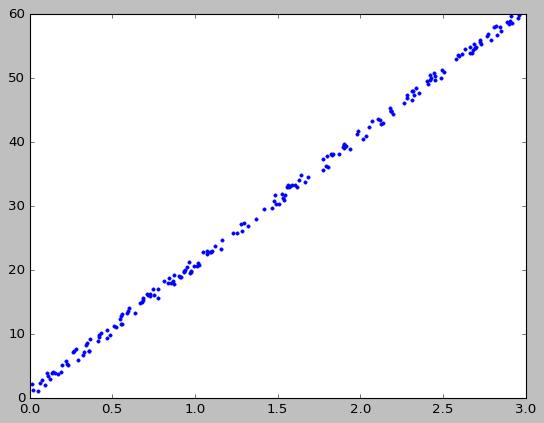

In [58]:
plt.plot(xy[:,0], xy[:,1], '.')
plt.show()

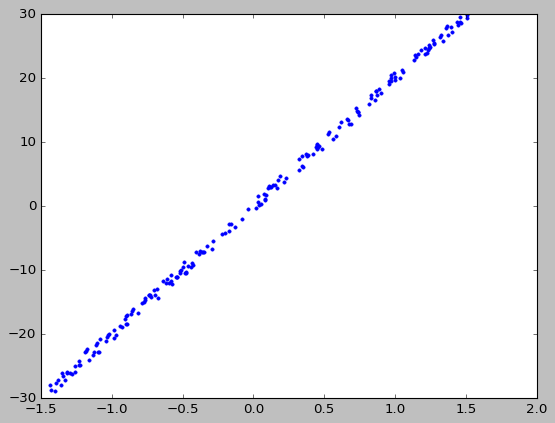

In [ ]:
xy_center = xy - np.mean(xy, axis = 0) #To center on 0,0

plt.plot(xy_center[:,0], xy_center[:,1], '.')
plt.show()

### How to find PCA

We have to find a d so it maximizes the trace of d.T * X.T * Xd.

Since it is a maximization problem, we need to restrict result so it has norm 1

Norm 1 maximization.
If we don't do this, we could always find a configuration so it keeps increasing
(d.T)(d) = 1

In [60]:
autovalores, autovectores = np.linalg.eig(xy_center.T.dot(xy_center))
print(autovectores)

[[-0.99875285 -0.04992746]
 [ 0.04992746 -0.99875285]]


Eigen value defines what is the direction with more information


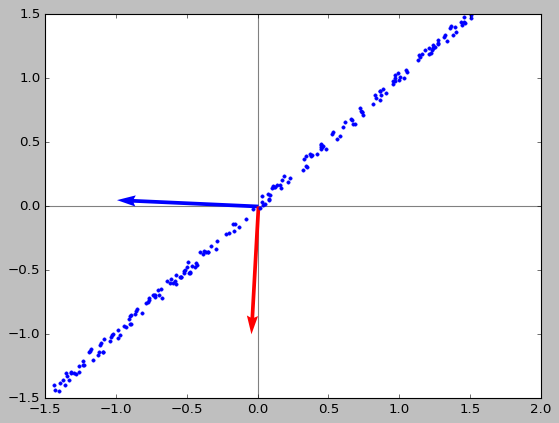

In [66]:
from utils.graphic_vectors import graph_vecs
graph_vecs(autovectores.T, ['blue', 'red'])

print("Eigen value defines what is the direction with more information")
plt.plot(xy_center[:, 0], xy_center[:, 1]/20, '.')

plt.show()

In [68]:
print("Red one is the bigger one, so it let us acquire more information")
print(autovalores)

Red one is the bigger one, so it let us acquire more information
[1.70408413e-01 6.24117888e+04]


In [69]:
xy_nuevo = autovectores.T.dot(xy_center.T)

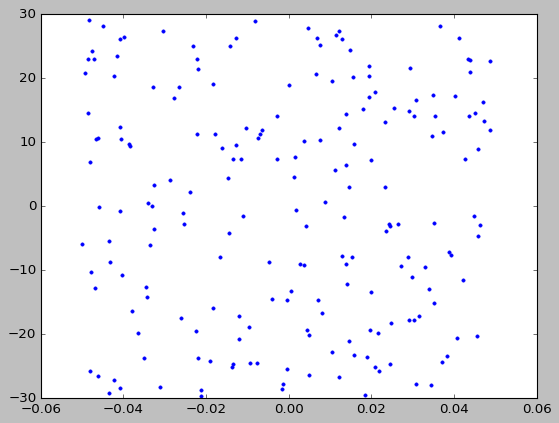

In [72]:
plt.plot(xy_nuevo[0, :], xy_nuevo[1, :], '.')

plt.show()


# Use of PCA in images

When we have a lot of variables and we need to reduce the amount of dimensions while keeping the greatest amount of possible information. It is a trade-off

In [4]:
import imageio
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd

In [ ]:
imgs = "s3/3.pgm"
path_img = os.path.join("./algebra-aplicada-master/algebra-aplicada-master/03 - Algebra Lineal Aplicada - Analisis de Componentes Principales (PCA)/imagenes", imgs)
im = imageio.imread(path_img)
im = im.astype(np.uint8)

print(im)

[[101 106 102 ... 108 107 108]
 [101 104 102 ... 106 108 105]
 [ 99 104 102 ... 108 106 111]
 ...
 [ 64  69  75 ...  42  48  48]
 [ 74  81  85 ...  46  48  44]
 [ 77  83  84 ...  46  50  45]]


C:\Users\User\AppData\Local\Temp\ipykernel_18976\1979988205.py:3: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  im = imageio.imread(path_imgs)


In [8]:
print(f'Max original: {np.amax(im)}')
print(f'Min original: {np.amin(im)}')

Max original: 204
Min original: 10


In [ ]:
img_original = im
#Normalizing
im = im / 255

print(f'Max original: {np.amax(im)}')
print(f'Min original: {np.amin(im)}')

Max original: 0.8
Min original: 0.0392156862745098


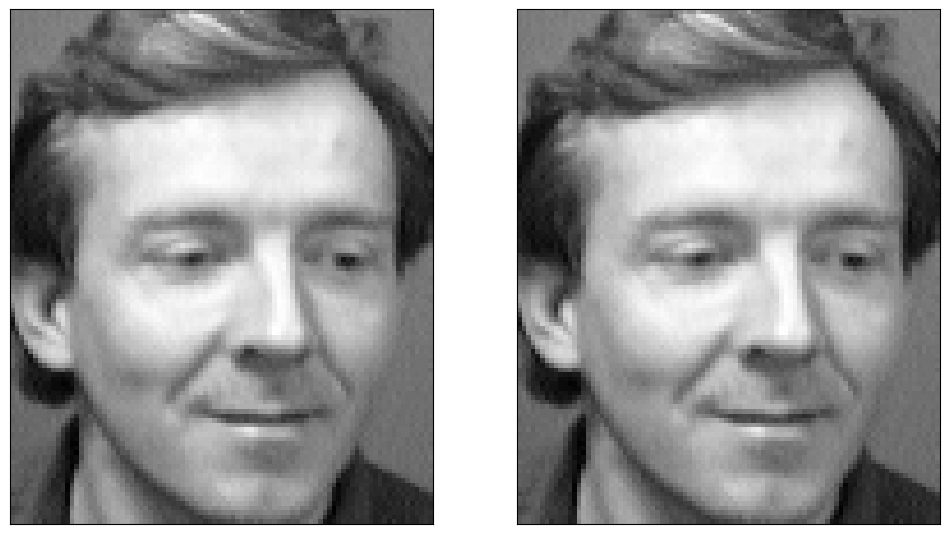

In [10]:
fix, ax = plt.subplots(1,2, figsize = (12,12),
                       subplot_kw={'xticks' : [], 'yticks' : []})
ax[0].imshow(img_original, cmap = 'gray')
ax[1].imshow(im, cmap = 'gray')

./algebra-aplicada-master/algebra-aplicada-master/03 - Algebra Lineal Aplicada - Analisis de Componentes Principales (PCA)/imagenes/*/*.pgm


C:\Users\User\AppData\Local\Temp\ipykernel_18976\4231862248.py:10: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  im = imageio.imread(path)
C:\Users\User\AppData\Local\Temp\ipykernel_18976\4231862248.py:10: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  im = imageio.imread(path)
C:\Users\User\AppData\Local\Temp\ipykernel_18976\4231862248.py:10: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` direct

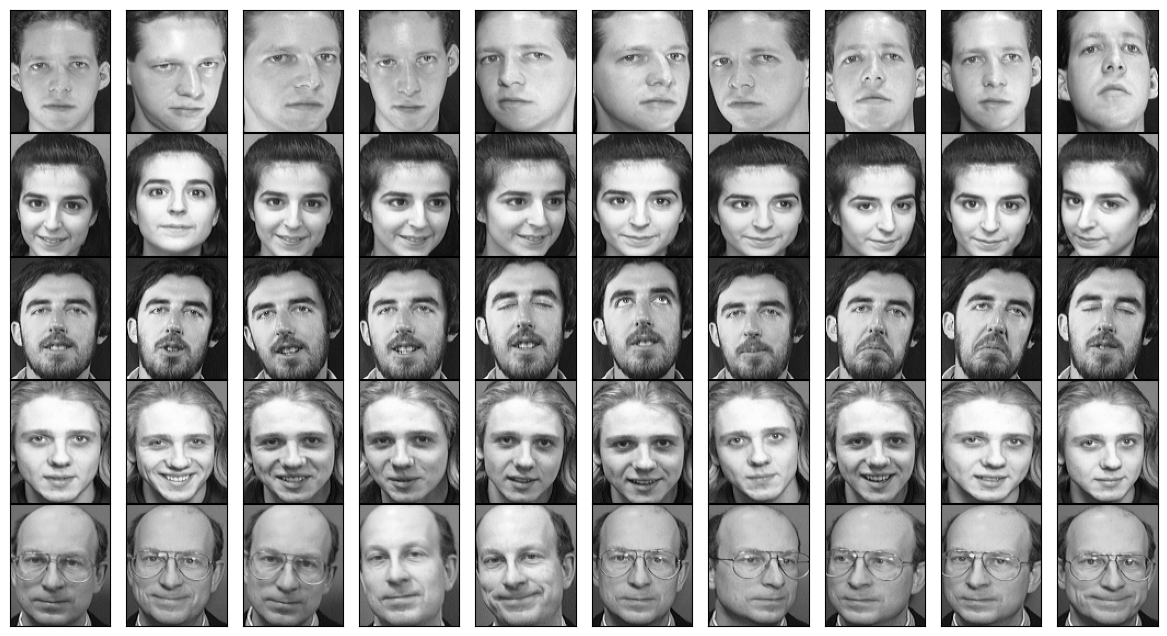

In [17]:
#Let's read all the images
from glob  import iglob

path_folder = "./algebra-aplicada-master/algebra-aplicada-master/03 - Algebra Lineal Aplicada - Analisis de Componentes Principales (PCA)/imagenes"
all_imgs = os.path.join(path_folder,"*/*.pgm").replace("\\", "/")
print(all_imgs)
caras = pd.DataFrame([])

for path in iglob(all_imgs):
    im = imageio.imread(path)
    cara = pd.Series(im.flatten(), name = path)
    caras = pd.concat([caras, cara], axis = 1)

caras = caras.T

fig, axes = plt.subplots(5, 10, figsize = (15,8),
                       subplot_kw={'xticks' : [], 'yticks' : []},
                       gridspec_kw= dict(hspace = 0.01, wspace = 0.01))

for i, ax in enumerate(axes.flat):
    ax.imshow(caras.iloc[i].values.reshape(112, 92), cmap = 'gray')

In [18]:
from sklearn.decomposition import PCA


In [29]:
caras_pca = PCA(n_components = 0.999) #50% variance of the data

caras_pca.fit(caras)

PCA(n_components=0.999)

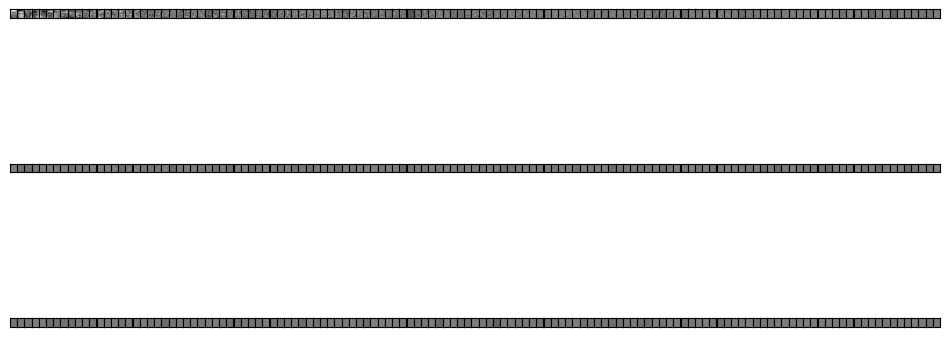

In [30]:
filas = 3
columnas = caras_pca.n_components_ // filas

fig, axes = plt.subplots(filas, columnas, figsize = (12,6),
                       subplot_kw={'xticks' : [], 'yticks' : []},
                       gridspec_kw= dict(hspace = 0.01, wspace = 0.01))

for i, ax in enumerate(axes.flat):
    ax.imshow(caras_pca.components_[i].reshape(112, 92), cmap = 'gray')

# Meaning
The previous plot is telling that those (6 faces for 50% and 44 for 80%) are enough to reproduce all the others

In [31]:
print(caras_pca.n_components_)

388


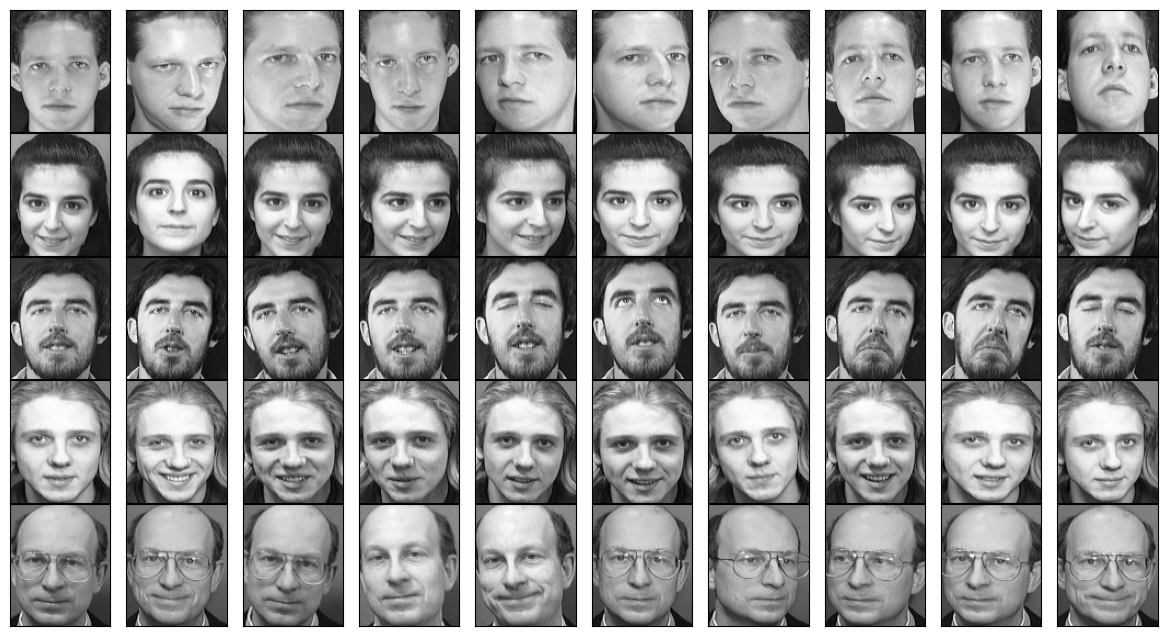

In [32]:
components = caras_pca.transform(caras)
projection = caras_pca.inverse_transform(components)

fig, axes = plt.subplots(5, 10, figsize = (15,8),
                       subplot_kw={'xticks' : [], 'yticks' : []},
                       gridspec_kw= dict(hspace = 0.01, wspace = 0.01))

for i, ax in enumerate(axes.flat):
    ax.imshow(projection[i].reshape(112, 92), cmap = 'gray')